In [1]:
import numpy as np
import pandas as pd
import random
from IPython.display import Image

SEED = 1337
random.seed(SEED)
np.random.seed(SEED)

In [2]:
DESIRE_VERB = "desire/verb-effects.csv"
DESIRE_VERB_SAMPLES = "desire/verb-effects-samples.csv"
DESIRE_SCENARIO = "desire/scenario-effects.csv"
DESIRE_SCENARIO_SAMPLES = "desire/scenario-effects-samples.csv"

BELIEF_VERB = "belief/verb-effects.csv"
BELIEF_VERB_SAMPLES = "belief/verb-effects-samples.csv"
BELIEF_SCENARIO = "belief/scenario-effects.csv"
BELIEF_SCENARIO_SAMPLES = "belief/scenario-effects-samples.csv"

POLARITY_TENSE_LEVELS = ["positive-past", "negative-future", "positive-future", "negative-past"]
VERB_LEVELS =  [
    "apologize",
    "boast",
    "complain",
    "congratulate",
    "convince",
    "disprove",
    "dissuade",
    "doubt",
    "fear",
    "hate",
    "hope",
    "know",
    "lie",
    "like",
    "love",
    "mislead",
    "notify",
    "persuade",
    "regret",
    "remember",
    "tell",
    "think",
    "wish",
    "worry"
]
SCENARIO_LEVELS = [
    "accountant:know",
    "actor:hate",
    "analyst:notify",
    "assistant:wish",
    "baker:know",
    "basketballplayer:hate",
    "batter:worry",
    "bookkeeper:lie",
    "boss:tell",
    "bouncer:dissuade",
    "bricklayer:complain",
    "businesswoman:boast",
    "chef:love",
    "chemist:lie",
    "child:apologize",
    "clerk:apologize",
    "climber:like",
    "coach:congratulate",
    "concierge:convince",
    "conductor:congratulate",
    "congresswoman:regret",
    "contractor:mislead",
    "coroner:persuade",
    "curator:like",
    "cyclist:think",
    "dancer:boast",
    "daughter:convince",
    "defendant:hope",
    "deliveryman:regret",
    "detective:disprove",
    "director:congratulate",
    "dishwasher:complain",
    "diver:fear",
    "doctor:think",
    "driver:regret",
    "economist:mislead",
    "electrician:disprove",
    "engineer:persuade",
    "executive:know",
    "farmer:persuade",
    "filmmaker:lie",
    "firefighter:boast",
    "fisherman:love",
    "gambler:like",
    "gardener:remember",
    "guitarist:worry",
    "hacker:boast",
    "hiker:remember",
    "homeowner:hate",
    "inspector:convince",
    "jeweler:remember",
    "journalist:worry",
    "landlord:hope",
    "lawyer:disprove",
    "liquorstoreowner:tell",
    "literaryagent:mislead",
    "littlegirl:fear",
    "mechanic:notify",
    "model:complain",
    "moderator:congratulate",
    "mother:lie",
    "mother:remember",
    "musician:hope",
    "nanny:dissuade",
    "newsanchor:notify",
    "nurse:know",
    "painter:think",
    "paramedic:hate",
    "pharmacist:notify",
    "pilot:mislead",
    "politician:wish",
    "priest:love",
    "professor:think",
    "programmer:doubt",
    "publisher:doubt",
    "reporter:dissuade",
    "runner:doubt",
    "sailor:complain",
    "salesman:wish",
    "scholar:dissuade",
    "scientist:disprove",
    "secretary:fear",
    "shopkeeper:doubt",
    "singer:wish",
    "soccerplayer:love",
    "soldier:fear",
    "strategist:tell",
    "swimmer:like",
    "teacher:apologize",
    "therapist:convince",
    "tourist:regret",
    "trainer:persuade",
    "travelagent:hope",
    "uncle:apologize",
    "waiter:worry",
    "zookeeper:tell"
]

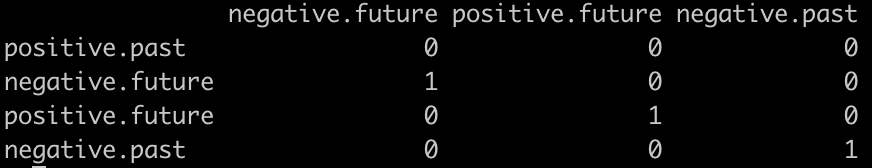

In [3]:
# Contrasts --- reference level is "positive.past"
Image(filename='contrasts.png')

In [4]:
with open(DESIRE_VERB) as f:
    dv = pd.read_csv(f)
with open(DESIRE_VERB_SAMPLES) as f:
    dvs = pd.read_csv(f)
with open(DESIRE_SCENARIO) as f:
    ds = pd.read_csv(f)
with open(DESIRE_SCENARIO_SAMPLES) as f:
    dss = pd.read_csv(f)
with open(BELIEF_VERB) as f:
    bv = pd.read_csv(f)
with open(BELIEF_VERB_SAMPLES) as f:
    bvs = pd.read_csv(f)
with open(BELIEF_SCENARIO) as f:
    bs = pd.read_csv(f)
with open(BELIEF_SCENARIO_SAMPLES) as f:
    bss = pd.read_csv(f)

In [5]:
# Functions for tidying the effects estimates

def label_level(row: pd.Series) -> str:
    param = row["parameter"]
    if "1," in param:
        return POLARITY_TENSE_LEVELS[0]
    elif "2," in param:
        return POLARITY_TENSE_LEVELS[1]
    elif "3," in param:
        return POLARITY_TENSE_LEVELS[2]
    elif "4," in param:
        return POLARITY_TENSE_LEVELS[3]
    else:
        return None
    
    
def tidy(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.rename({"Unnamed: 0": "parameter"}, axis=1)
    effect = None
    if "verb" in df.columns:
        effect = "verb"
    elif "scenario" in df.columns:
        effect = "scenario"
    df_new = df_new.reindex(
        columns=[effect, "parameter", "mean", "se_mean", "sd", "2.5%", "25%", "50%", "75%", "97.5%", "n_eff", "Rhat"],
    )
    df_new["parameter"] = df_new.apply(label_level, axis=1)
    return df_new.sort_values(effect).reset_index(drop=True)

In [6]:
dv_tidy = tidy(dv)
ds_tidy = tidy(ds)
bv_tidy = tidy(bv)
bs_tidy = tidy(bs)

In [7]:
bs_tidy.head()

,scenario,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,accountant-know,positive-past,-0.435018,0.000897,0.177866,-0.781680,-0.554618,-0.435916,-0.315813,-0.084425,39308.893917,0.999920
1,accountant-know,positive-future,0.457950,0.001215,0.231358,0.004625,0.303349,0.457153,0.607771,0.921311,36251.597019,0.999904
2,accountant-know,negative-past,0.331148,0.001633,0.337580,-0.340720,0.105219,0.333007,0.560676,0.988751,42713.471635,0.999942
3,accountant-know,negative-future,0.259139,0.001734,0.312150,-0.357456,0.048230,0.262043,0.469771,0.865622,32399.065258,0.999930
4,actor-hate,positive-past,0.051620,0.000976,0.186738,-0.304953,-0.073906,0.050713,0.176072,0.418825,36631.692731,0.999945


In [8]:
# dv_tidy.to_csv("desire/desire-verb-effects-tidy.csv", index=False)
# ds_tidy.to_csv("desire/desire-scenario-effects-tidy.csv", index=False)
# bv_tidy.to_csv("belief/belief-verb-effects-tidy.csv", index=False)
# bs_tidy.to_csv("belief/belief-scenario-effects-tidy.csv", index=False)

In [12]:
def relabel_verb_col(col: str) -> str:
    col_name_components = col.split(".")
    verb_id = int(col_name_components[-1]) - 1
    verb_name = VERB_LEVELS[verb_id]
    return "-".join([verb_name, col_name_components[1]])

def relabel_scenario_col(col: str) -> str:
    col_name_components = col.split(".")
    scenario_id = int(col_name_components[-1]) - 1
    scenario_name = SCENARIO_LEVELS[scenario_id]
    return "-".join([scenario_name, col_name_components[1]])

def bootstrap_se(col: pd.Series, n_bootstraps: int = 999) -> float:
    samples = random.choices(col, k=len(col) * n_bootstraps)
    samples_arr = np.array(samples).reshape((n_bootstraps, len(col)))
    return np.std(np.mean(samples_arr, 1))

# Adds columns for random slopes in place
def summarize_slopes(df: pd.DataFrame,
                     factor: str,
                     bootstrap_mean_se: bool = True,
                     n_bootstraps = 30
                    ) -> pd.DataFrame:
    # stuff for calculating CIs
    N_samples = len(df)
    ci_025_idx = int(np.floor(N_samples * 0.025))
    ci_25_idx = int(np.floor(N_samples * 0.25))
    ci_50_idx = int(np.floor(N_samples * 0.50))
    ci_75_idx = int(np.floor(N_samples * 0.75))
    ci_975_idx = int(np.floor(N_samples * 0.975))
    ci_idxs = [ci_025_idx, ci_25_idx, ci_50_idx, ci_75_idx, ci_975_idx]
    ci_col_names = ["2.5%", "25%", "50%", "75%", "97.5%"]
    
    # extract columns corresponding to each slope component
    one_cols, two_cols, three_cols, four_cols = [], [], [], []
    for c in df.columns:
        if "-1" in c:
            one_cols.append(c)
        elif "-2" in c:
            two_cols.append(c)
        elif "-3" in c:
            three_cols.append(c)
        elif "-4" in c:
            four_cols.append(c)
            
    # compute colufmns giving the actual values of the slopes for each polarity*tense level
    # TODO: add standard errors for mean
    cols = [factor, "polarity-tense"] + ci_col_names + ["mean", "sd"]
    if bootstrap_mean_se:
        cols.append("mean_se")
    summary_df = pd.DataFrame(columns=cols)
    for (one_col, two_col, three_col, four_col) in zip(one_cols, two_cols, three_cols, four_cols):
        col_root = one_col.split("-")[0]
        pp_col_name = "-".join([col_root, "positive", "past"])
        pf_col_name = "-".join([col_root, "positive", "future"])
        np_col_name = "-".join([col_root, "negative", "past"])
        nf_col_name = "-".join([col_root, "negative", "future"])
        
        # Compute slope values
        df[pp_col_name] = df[one_col]
        df[pf_col_name] = df[one_col] + df[three_col]
        df[np_col_name] = df[one_col] + df[four_col]
        df[nf_col_name] = df[one_col] + df[two_col]
        
        # Compute stats for each slope
        slope_cols = [pp_col_name, pf_col_name, np_col_name, nf_col_name]
        for c in slope_cols:
            polarity_tense = "-".join(c.split("-")[1:])
            summary_row = {factor: col_root, "polarity-tense": polarity_tense, "mean": np.mean(df[c]), "sd": np.std(df[c])}
            if bootstrap_mean_se:
                summary_row["mean_se"] = bootstrap_se(df[c], n_bootstraps = n_bootstraps)
            sorted_c = sorted(df[c])
            for ci_col_name, ci_idx in zip(ci_col_names, ci_idxs):
                summary_row[ci_col_name] = sorted_c[ci_idx]
            summary_df = summary_df.append(summary_row, ignore_index=True)
    return summary_df

In [13]:
# Relabel columns
dvs.columns = list(map(relabel_verb_col, dvs.columns))
bvs.columns = list(map(relabel_verb_col, bvs.columns))
dss.columns = list(map(relabel_scenario_col, dss.columns))
bss.columns = list(map(relabel_scenario_col, bss.columns))

ValueError: invalid literal for int() with base 10: 'apologize-1'

In [14]:
# Create summary DataFrames
dvs_sum = summarize_slopes(dvs, "verb", bootstrap_mean_se=False)
bvs_sum = summarize_slopes(bvs, "verb", bootstrap_mean_se=False)
dss_sum = summarize_slopes(dss, "scenario", bootstrap_mean_se=False)
bss_sum = summarize_slopes(bss, "scenario", bootstrap_mean_se=False)

In [19]:
bvs_sum.head(20)

,verb,polarity-tense,2.5%,25%,50%,75%,97.5%,mean,sd
0,apologize,positive-past,-0.253220,0.067275,0.235229,0.407767,0.761505,0.240339,0.258072
1,apologize,positive-future,-0.481499,-0.222483,-0.087593,0.044683,0.311740,-0.087972,0.201251
2,apologize,negative-past,-0.210462,0.137186,0.313853,0.491499,0.845305,0.314408,0.268085
3,apologize,negative-future,-0.316373,-0.042387,0.097411,0.238988,0.515562,0.098408,0.211274
4,boast,positive-past,0.608490,0.925019,1.095147,1.266927,1.613278,1.098689,0.256646
5,boast,positive-future,0.486300,0.732188,0.865397,0.996848,1.266099,0.867236,0.199262
6,boast,negative-past,-0.417498,-0.072204,0.107105,0.280863,0.628591,0.104533,0.265311
7,boast,negative-future,-0.653784,-0.379782,-0.240450,-0.100350,0.166393,-0.240684,0.209519
8,complain,positive-past,0.615284,0.938514,1.108006,1.280335,1.632719,1.111829,0.258169
9,complain,positive-future,0.122530,0.377747,0.509846,0.642940,0.911155,0.511053,0.200464


In [21]:
dvs_sum.to_csv("desire/desire-verb-effects-summary.csv", index=False)
dss_sum.to_csv("desire/desire-scenario-effects-summary.csv", index=False)
bvs_sum.to_csv("belief/belief-verb-effects-summary.csv", index=False)
bss_sum.to_csv("belief/belief-scenario-effects-summary.csv", index=False)